## Observations and Insights

## Dependencies and starter code

In [386]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_combine = pd.merge(mouse_metadata, study_results,how='outer', on="Mouse ID")
mouse_combine

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [387]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [388]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Summary statistics

In [389]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mice = mouse_combine["Mouse ID"].unique()
drugs = mouse_combine["Drug Regimen"].unique()
time = mouse_combine["Timepoint"].unique()

num_mouse = len(mice)
num_drugs = len(drugs)
num_measurements = len(time)
num_samples = num_drugs * num_measurements

data_summary = pd.DataFrame({"# Mice": [num_mouse],
                         "# Drug Regimen": [num_drugs],
                         "# Time Measurements": [num_measurements],
                         "# Samples": [num_samples]})
data_summary



,# Mice,# Drug Regimen,# Time Measurements,# Samples
0,249,10,10,100


In [390]:
summarystats = pd.DataFrame(mouse_combine.groupby("Drug Regimen").count())

#Use groupby to create summary stats by drug regime, add results into columns in summarystats

summarystats["Mean"] = pd.DataFrame(mouse_combine.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summarystats["Median"] = pd.DataFrame(mouse_combine.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summarystats["Standard Deviation"] = pd.DataFrame(mouse_combine.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summarystats["Variance"] = pd.DataFrame(mouse_combine.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summarystats["SEM"] = pd.DataFrame(mouse_combine.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

#Clean up columns, just keeping a count column for some of the graphs below
summarystats = summarystats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

#Rename count column
summarystats = summarystats.rename(columns = {"Mouse ID" : "Trials"})

summarystats.head()



,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


## Bar plots

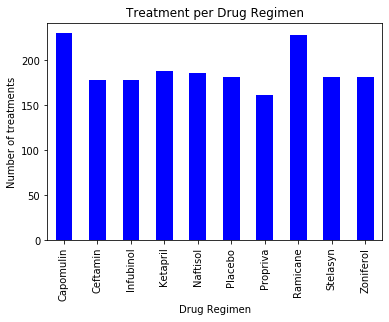

<Figure size 432x288 with 0 Axes>

In [415]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Filter the DataFrame down only to those columns to chart
datapoints = summarystats[["Trials"]]

# Use DataFrame.plot() in order to create a bar chart of the data
datapoints.plot(kind="bar", figsize=(6,4), color = "b", legend=False)

# Set a title for the chart
plt.title("Treatment per Drug Regimen")
plt.ylabel('Number of treatments')
plt.show()
plt.tight_layout()

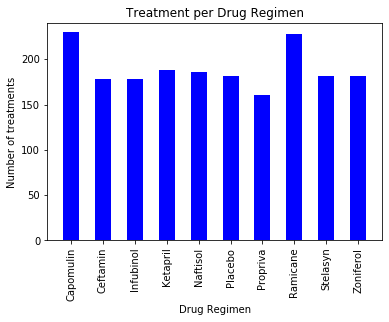

In [416]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Set x axis and tick locations
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.bar(x_axis, datapoints["Trials"], color = "b", width = .5)
plt.xticks(tick_locations, datapoints.index.values, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(datapoints["Trials"])+10)

# Set a Title and labels
plt.title("Treatment per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel('Number of treatments')

# Save our graph and show the grap
plt.show()

## Pie plots

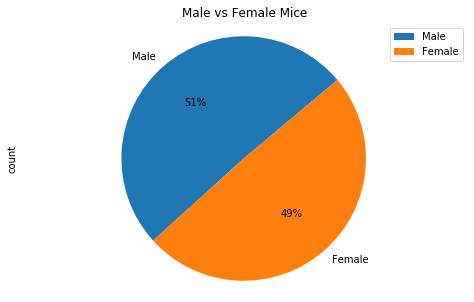

In [393]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = pd.DataFrame(mouse_combine["Sex"].value_counts())
#print(gender)

gender_df = pd.DataFrame({'count':[958, 935]},
                   index = ['Male', 'Female'])
gender_pie = gender_df.plot.pie(y='count', figsize=(8, 5),autopct="%1.0f%%", startangle=40)
plt.axis('equal')
plt.title('Male vs Female Mice')
plt.show()

/Users/sandybonbon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


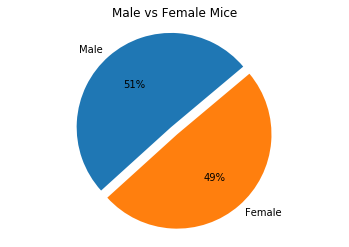

In [394]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = pd.DataFrame(mouse_combine["Sex"].value_counts())
labels = ["Male", "Female"]
plt.pie(gender_count, explode=explode, labels=labels, autopct="%1.0f%%", startangle=40)
plt.axis('equal')
plt.title('Male vs Female Mice')
plt.show()

# Quartiles, outliers and boxplots

In [395]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Grab just data for the 4 smallest mean tumor volume regimens
filtered_df = mouse_combine.loc[(mouse_combine["Drug Regimen"] == "Capomulin") | (mouse_combine["Drug Regimen"] == "Ramicane") | (mouse_combine["Drug Regimen"] == "Ceftamin") | (mouse_combine["Drug Regimen"] == "Propriva"), :]

# Sort by Timpepoints based on the latest values
filtered_df = filtered_df.sort_values("Timepoint", ascending = False)

# Dropping duplicates, keeping first value, should be the latest timepoint per mouse
filtered_df = filtered_df.drop_duplicates(subset="Mouse ID", keep='first')


In [396]:
# Determine quartiles
quartiles = filtered_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print a filtered dataframe of any outliers
outliers_df = filtered_df.loc[(filtered_df['Tumor Volume (mm3)'] > upper_bound) | (filtered_df['Tumor Volume (mm3)'] < lower_bound), :]
outliers_df

print(f'No Outliers')

No Outliers


In [397]:
Last = mouse_combine.groupby(['Mouse ID']).agg({
        'Drug Regimen': "first",
        'Timepoint':max,
        'Tumor Volume (mm3)': "last"})
LastDF=pd.DataFrame(Last)
LastDF.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
a203,Infubinol,45,67.973419
a251,Infubinol,45,65.525743
a262,Placebo,45,70.717621
a275,Ceftamin,45,62.999356
a366,Stelasyn,30,63.440686


In [398]:
First = mouse_combine.groupby(['Mouse ID']).agg({
        'Drug Regimen': "last",
        'Timepoint':min,
        'Tumor Volume (mm3)': "first"})
FirstDF=pd.DataFrame(First)
FirstDF.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
a203,Infubinol,0,45.0
a251,Infubinol,0,45.0
a262,Placebo,0,45.0
a275,Ceftamin,0,45.0
a366,Stelasyn,0,45.0


In [399]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

TopFour = LastDF[LastDF['Drug Regimen'].isin(['Capomulin', "Ceftamin", 'Infubinol', 'Ramicane'])]

capomulin = LastDF.loc[LastDF["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = LastDF.loc[LastDF["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = LastDF.loc[LastDF["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = LastDF.loc[LastDF["Drug Regimen"] == "Ceftamin"]

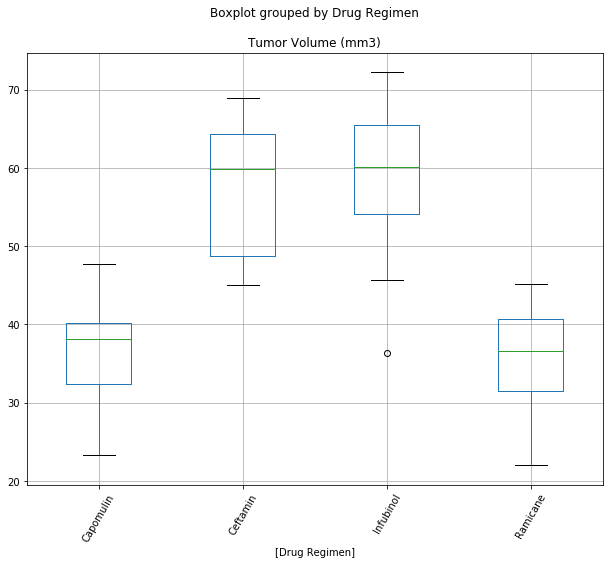

In [400]:
TopFour.boxplot(column=['Tumor Volume (mm3)'],by=(['Drug Regimen']), figsize=(10,8),rot=60 )

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume')

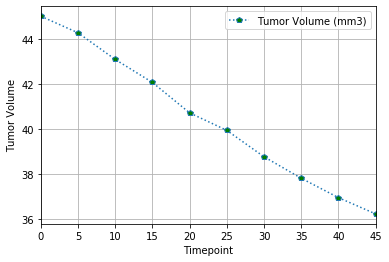

In [414]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Filter original data for just the Capomulin Drug Regime
Capomulin = mouse_combine[mouse_combine['Drug Regimen'] == ('Capomulin')]
grouped = Capomulin.groupby(['Timepoint']).mean()

grouped.plot.line(y='Tumor Volume (mm3)', grid=True, style='p:', markerfacecolor='green')
tumor = pd.DataFrame(grouped)
plt.ylabel("Tumor Volume")

In [402]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

weight = tumor.iloc[:,1]
volume = tumor.iloc[:,2]

correlation = st.pearsonr(weight,volume)
correlation
print(f"Correlation coefficient between weight and volume is {round(correlation[0],4)}")

Correlation coefficient between weight and volume is 0.8207


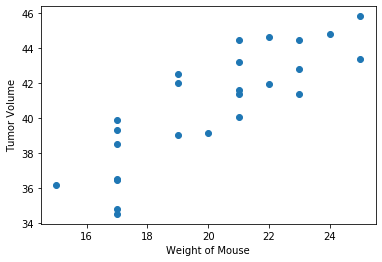

In [419]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Create Scatter Plot with values calculated above
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

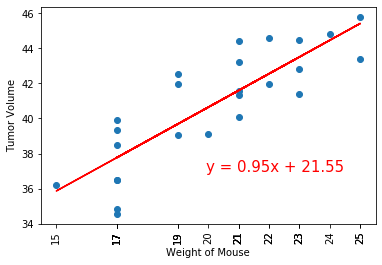

In [409]:
#and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Pull values for x and y values
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(19.93,37),fontsize=15,color="red")
plt.xticks(mouse_weight, rotation=90)
plt.show()


SUMMARY:
    
1) Capomulin and Ramicane show the greast reduction in tumor size over 45 days

2) There is a high correlation coefficient between the weight the mouse and size of the tumor at .82

3) Sample size was equally weighted between female and male and would be be a fair depiction of both genders.